### STEPS TO BE FOLLOWED 
1. Read the image 
2. Convert to gray scale and binary 
3. Perform series of erosion and dilation 
4. Do Contour Analysis  and find the contour 
5. If the specified contour is greater than the threshold value of image pixel skelitonize and find SP (Segmentation Points)
6. Separate the characters and find the contour in them


## 1. Read the image

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
image_location = "test_img/cat.png"

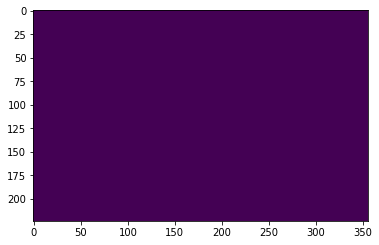

In [45]:
img = cv2.imread(image_location,0)
# img = cv2.imread(input_image)?
# plt.imshow(img)?
ret3,th4 = cv2.threshold(img,0,255,cv2.THRESH_BINARY)

th4 = invert(th4)

plt.imshow(th4)
th4[th4 == 255] = 1
skel = skeletonize(th4)
# plt.show()

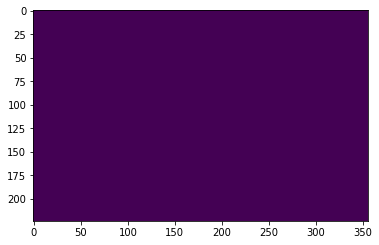

In [50]:
plt.imshow(skel)

## 2. Convert to gray scale and binary 

In [47]:
cv2.imwrite("catt.png",skel)

TypeError: img data type = 0 is not supported

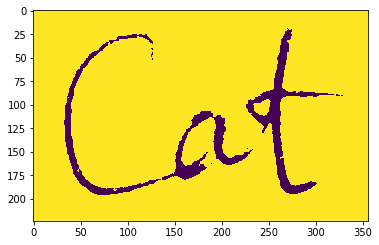

In [8]:
#grayscale
gray = cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
#binary
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
plt.imshow(thresh)


In [ ]:
import numpy as np
import cv2
from imutils import resize
from imutils.contours import sort_contours

from skimage.morphology import skeletonize as skl

path = 'test_img/cat.png'
img = cv2.imread(path, 0)
# Some smoothing to get rid of the noise
# img = cv2.bilateralFilter(img, 5, 35, 10)
img = cv2.GaussianBlur(img, (3, 3), 3)
img = resize(img, width=700)

# Preprocessing to get the shapes
th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                           cv2.THRESH_BINARY, 35, 11)
# Invert to hightligth the shape
th = cv2.bitwise_not(th)

# Text has mostly vertical and right-inclined lines. This kernel seems to
# work quite well
kernel = np.array([[0, 1, 1],
                  [0, 1, 0],
                  [1, 1, 0]], dtype='uint8')

th = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel)

cv2.imshow('mask', th)
cv2.waitKey(0)


#def contour_sorter(contours):
#    '''Sort the contours by multiplying the y-coordinate and sorting first by
#    x, then by y-coordinate.'''
#    boxes = [cv2.boundingRect(c) for c in contours]
#    cnt = [4*y, x for y, x, , _, _ in ]

# Skeletonize the shapes
# Skimage function takes image with either True, False or 0,1
# and returns and image with values 0, 1.
th = th == 255
th = skl(th)
th = th.astype(np.uint8)*255

# Find contours of the skeletons
_, contours, _ = cv2.findContours(th.copy(), cv2.RETR_EXTERNAL,
                                  cv2.CHAIN_APPROX_NONE)
# Sort the contours left-to-rigth
contours, _ = sort_contours(contours, )
#
# Sort them again top-to-bottom


def skeleton_endpoints(skel):
    # Function source: https://stackoverflow.com/questions/26537313/
    # how-can-i-find-endpoints-of-binary-skeleton-image-in-opencv
    # make out input nice, possibly necessary
    skel = skel.copy()
    skel[skel != 0] = 1
    skel = np.uint8(skel)

    # apply the convolution
    kernel = np.uint8([[1,  1, 1],
                       [1, 10, 1],
                       [1,  1, 1]])
    src_depth = -1
    filtered = cv2.filter2D(skel, src_depth,kernel)

    # now look through to find the value of 11
    # this returns a mask of the endpoints, but if you just want the
    # coordinates, you could simply return np.where(filtered==11)
    out = np.zeros_like(skel)
    out[np.where(filtered == 11)] = 1
    rows, cols = np.where(filtered == 11)
    coords = list(zip(cols, rows))
    return coords

# List for endpoints
endpoints = []
# List for (x, y) coordinates of the skeletons
skeletons = []



for contour in contours:
    if cv2.arcLength(contour, True) > 100:
        # Initialize mask
        mask = np.zeros(img.shape, np.uint8)
        # Bounding rect of the contour
        x, y, w, h = cv2.boundingRect(contour)
        mask[y:y+h, x:x+w] = 255
        # Get only the skeleton in the mask area
        mask = cv2.bitwise_and(mask, th)
        # Take the coordinates of the skeleton points
        rows, cols = np.where(mask == 255)
        # Add the coordinates to the list
        skeletons.append(list(zip(cols, rows)))
        

        # Find the endpoints for the shape and update a list
        eps = skeleton_endpoints(mask)
        endpoints.append(eps)

        # Draw the endpoints
#         [cv2.circle(th, ep, 5, 255, 1) for ep in eps]
        cv2.imshow('mask', mask)
        cv2.waitKey(500)
cv2.imwrite("res/skl_cat.png",th)# Stack the original and modified
th = resize(np.hstack((img, th)), 1200)


#    cv2.waitKey(50)

# TODO
# Walk the points using the endpoints by minimizing the walked distance
# Points in between can be used many times, endpoints only once
cv2.imshow('mask', th)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [19]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert


image = invert(thresh)


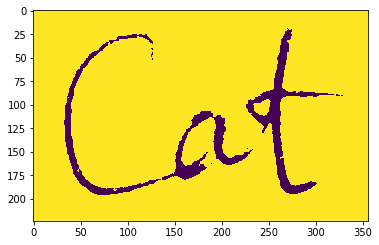

In [21]:
skeleton = skeletonize(image)


ValueError: Image contains values other than 0 and 1

## 3. Perform series of erosion and dilation 

[[230 224 229]
 [230 224 229]
 [230 224 229]
 ...
 [227 221 226]
 [227 221 226]
 [226 220 225]]
[[231 225 230]
 [231 225 230]
 [231 225 230]
 ...
 [229 223 228]
 [228 222 227]
 [227 221 226]]
[[231 225 230]
 [231 225 230]
 [231 225 230]
 ...
 [230 224 229]
 [228 222 227]
 [227 221 226]]
[[232 226 231]
 [232 226 231]
 [231 225 230]
 ...
 [229 223 228]
 [228 222 227]
 [227 221 226]]
[[233 227 232]
 [233 227 232]
 [231 225 230]
 ...
 [227 221 226]
 [227 221 226]
 [227 221 226]]
[[233 227 232]
 [233 227 232]
 [231 225 230]
 ...
 [225 219 224]
 [225 219 224]
 [227 221 226]]
[[232 226 231]
 [232 226 231]
 [231 225 230]
 ...
 [225 219 224]
 [225 219 224]
 [227 221 226]]
[[232 226 231]
 [232 226 231]
 [231 225 230]
 ...
 [226 220 225]
 [226 220 225]
 [227 221 226]]
[[231 225 230]
 [231 225 230]
 [231 225 230]
 ...
 [229 223 228]
 [229 223 228]
 [229 223 228]]
[[230 224 229]
 [230 224 229]
 [232 226 231]
 ...
 [231 225 230]
 [231 225 230]
 [230 224 229]]
[[230 224 229]
 [230 224 229]
 [232 226 

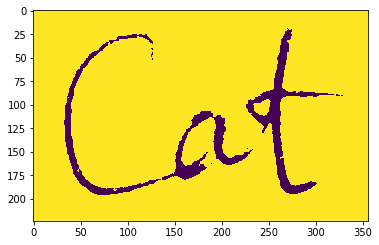

In [5]:
#grayscale
gray = cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
#binary
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
plt.imshow(thresh)

In [7]:
trans = np.transpose(thresh)
up = []
down = []

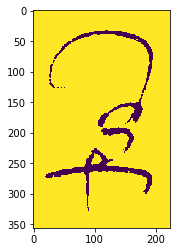

In [8]:
plt.imshow(trans)

In [26]:
arr = []


In [35]:
up = []
down = []
for val in trans:
    arr = []
    for i , elem in enumerate(val):
        
        if (elem == 0):
            arr.append(i)
    
    if(len(arr) == 1):
        up.append(arr[0])
    elif(len(arr) > 2):
        up.append(arr[0])
        down.append(arr[-1])
    else:
        i = 1 

In [36]:
up

[117,
 101,
 99,
 91,
 88,
 83,
 81,
 79,
 75,
 74,
 72,
 71,
 68,
 65,
 64,
 63,
 63,
 59,
 57,
 57,
 56,
 54,
 53,
 51,
 51,
 49,
 48,
 47,
 47,
 46,
 45,
 45,
 44,
 44,
 43,
 42,
 42,
 40,
 39,
 38,
 37,
 36,
 36,
 35,
 35,
 34,
 34,
 34,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 31,
 29,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 27,
 27,
 27,
 27,
 27,
 26,
 26,
 26,
 26,
 26,
 27,
 27,
 27,
 26,
 26,
 26,
 27,
 27,
 27,
 26,
 26,
 28,
 29,
 30,
 31,
 32,
 33,
 180,
 180,
 180,
 180,
 179,
 179,
 177,
 177,
 176,
 176,
 176,
 176,
 175,
 175,
 175,
 174,
 174,
 173,
 174,
 172,
 153,
 151,
 149,
 143,
 139,
 139,
 138,
 134,
 133,
 131,
 130,
 129,
 126,
 126,
 125,
 125,
 123,
 117,
 116,
 114,
 112,
 111,
 111,
 110,
 110,
 110,
 109,
 108,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 109,
 109,
 114,
 114,
 114,
 113,
 112,
 112,
 112,
 112,
 114,
 115,
 115,
 115,
 124,
 155,
 156,
 157,
 157,
 157,
 157,
 157,
 156,
 156,
 155,
 154,
 154,
 154,
 154,
 154,


In [37]:
sum(up)//len(up)

86

In [38]:
sum(down)//len(down)

172

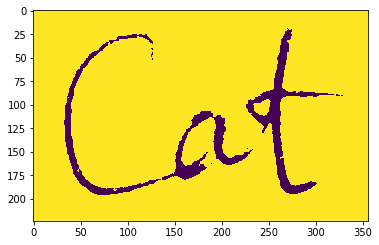

In [32]:
plt.imshow(thresh)

In [39]:
86+172



258

In [40]:
258/2

129.0